In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')
import seaborn as sns
sns.set_context("paper")
sns.set_style("ticks");

# Homework 1

## References

+ Module 1: Introduction
+ Module 2: Modern Machine Learning Software

## Instructions

+ Type your name and email in the "Student details" section below.
+ Develop the code and generate the figures you need to solve the problems using this notebook.
+ For the answers that require a mathematical proof or derivation you should type them using latex. If you have never written latex before and you find it exceedingly difficult, we will likely accept handwritten solutions.
+ The total homework points are 100. Please note that the problems are not weighed equally.

## Student details

+ **First Name: Shaunak**
+ **Last Name:Mukherjee**
+ **Email:mukher86@purdue.edu**
+ **Used generative AI to complete this assignment (Yes/No): No**
+ **Which generative AI tool did you use (if applicable)?:  NA**

## Problem 1 - Recursion vs Iteration

This problem adjusted from the [Structure and Interpretation of Computer Programs](https://mitpress.mit.edu/sites/default/files/sicp/full-text/book/book.html) book.
In particular from [this section](https://mitp-content-server.mit.edu/books/content/sectbyfn/books_pres_0/6515/sicp.zip/full-text/book/book-Z-H-11.html#%_sec_1.2.1).

Imagine you are working with a programming language that does not have loops.
This is how you have to think when writing code in `Jax`.
Let's say we want to write a function that calculates the factorial of a number:

$$
n! = n \times (n-1) \times (n-2) \times \dots \times 1
$$

The standard recursive definition of the factorial function is:

In [92]:

def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

Here is how it can be used:

In [93]:
factorial(5)

120

Let's unroll what actually happens behind the scenes:

```python
factorial(5)
5 * factorial(4)
5 * (4 * factorial(3))
5 * (4 * (3 * factorial(2)))
5 * (4 * (3 * (2 * factorial(1))))
5 * (4 * (3 * (2 * 1)))
5 * (4 * (3 * 2))
5 * (4 * 6)
5 * 24
120
```

You quickly notice, that the amount of intermediate results that are stored in memory grows exponentially with the input.
This won't work for large inputs, because you will run out of memory.
But, there is another way to achieve the same result without exploding memory usage.
We could start by multiplying 1 by 2, then the result with 3, then the result with 4, and so on.
So, we keep track of a running product that we update.
We don't need a loop to do this kind of iteration.
We can do it with recursion:

In [94]:
def fact_iter(product, counter, max_iter):
    if counter > max_iter:
        return product
    else:
        return fact_iter(counter * product, counter + 1, max_iter)

def good_factorial(n):
    return fact_iter(1, 1, n)

Check that this works as before:

In [95]:
good_factorial(5)

120

Here is how this unrolls:

```python
factorial(5)
fact_iter(1, 1, 5)
fact_iter(1, 2, 5)
fact_iter(2, 3, 5)
fact_iter(6, 4, 5)
fact_iter(24, 5, 5)
fact_iter(120, 6, 5)
120
```

We say that the second approach is *iterative* and the first approach is *recursive*.
We want to be writing iterative code, because it is more efficient.

Write iterative code that, given $n$, computes the fibonacci number:

$$
f_n = f_{n-1} + f_{n-2}
$$

where $f_0 = 0$ and $f_1 = 1$.
You should not use a loop!

**Answer:**

In [96]:
# Your code here - Demonstrate that it works

# Define main function (no loop or recusion)
def fibonacci_iterative(n):

  if n < 0:

      print("n must be a non-negative integer.")

  if n == 0:
      return 0
  if n == 1:
      return 1

  def fibo_step(a, b, counter, max_iter):
      if counter == max_iter:
          return b
      return fibo_step(b, a + b, counter + 1, max_iter)

  # Initial state need to be defined: (f0 = 0, f1 = 1, current step = 1, max_iter = n)
  return fibo_step(0, 1, 1, n)

 *Here show how your code works for $n=5$ like I did above with the factorial example.*

In [97]:
# Demonstration
fibonacci_iterative(5)

5

This is how it should compute

```
fibonacci_iterative(5)
fibo_step(0, 1, 1, 5)
fibo_step(1, 1, 2, 5)
fibo_step(1, 2, 3, 5)
fibo_step(2, 3, 4, 5)
fibo_step(3, 5, 5, 5)
5
```


## Problem 2 - The `foldl` function

The `foldl` function is a higher order function that is used to implement iteration.
It is defined as follows:

$$
\text{foldl}(f, z, [x_1, x_2, \dots, x_n]) = f(f(\dots f(f(z, x_1), x_2), \dots), x_n)
$$

where $f$ is a function that takes two arguments and $z$ is the initial value.
In words, `foldl` takes a function $f$, an initial value $z$, and a list $[x_1, x_2, \dots, x_n]$.
It then applies $f$ to $z$ and the first element of the list, then applies $f$ to the result of the previous application and the second element of the list, and so on.

Implement `foldl` in `Python`. Pay attention to create an iterative implementation.

**Answer:**

In [98]:
# Your code here - Demonstrate that it works

# Iterative
def foldl(f, z, lst):
  iterator = iter(lst)
  result = z

  while True:
      try:
          result = f(result, next(iterator))
      except StopIteration:
          return result

Use your `foldl` function to implement the `sum` function and the `product` function.

**Answer:**

In [99]:
# Defining sum and product functions using foldl function

def sum_list(lst):
    return foldl(lambda x, y: x + y, 0, lst) #The initial value is 0

def product_list(lst):
  return foldl(lambda x, y: x * y, 1, lst) # The initial value is 1


In [100]:
# Your code here - Demonstrate that it works
lst = [3, 1, 2, 5, 4]

print(f" Sum:{sum_list(lst)}")

print(f" Product:{product_list(lst)}")

 Sum:15
 Product:120


## Problem 3 - No Loops in Jax

Use `Jax`'s [`jax.lax.scan`](https://jax.readthedocs.io/en/latest/_autosummary/jax.lax.scan.html) to implement and `jit` a function that returns the Fibonacci sequence up to a given number.
Don't bother using integer types, just use `float32` for everything.

**Answer:**

In [101]:
# pip install -U "jax[cpu]"

In [102]:
# %load_ext autoreload
# %autoreload 2

In [103]:
import jax
import jax.numpy as jnp
from jax import lax
import functools as ft

# Function definition with jit, making n static
@ft.partial(jax.jit, static_argnums=(0,))
def fibonacci_sequence(n):
  def f(carry, _):
      a, b = carry
      return (b, a + b), b

  # Used jax.lax.scan here calculate the Fibonacci sequence
  _, fibo_sequence = lax.scan(f, (jnp.float32(0), jnp.float32(1)), None, length= n-1)
  return jnp.concatenate([jnp.array([0.], dtype=jnp.float32), fibo_sequence])


n = 10  # Length of the Fibonacci sequence
result = fibonacci_sequence(n)
print(f" For n = {n} Fibonacci sequence is: {jnp.int32(jnp.round(result))}")


 For n = 10 Fibonacci sequence is: [ 0  1  1  2  3  5  8 13 21 34]


In [104]:
# More demonstration below
n = 10

for i in range(1, n+1):
  result = fibonacci_sequence(i)
  int_result = jnp.int32(jnp.round(result))
  print(f"For n = {i}, Fibonacci sequence is: {int_result}")

For n = 1, Fibonacci sequence is: [0]
For n = 2, Fibonacci sequence is: [0 1]
For n = 3, Fibonacci sequence is: [0 1 1]
For n = 4, Fibonacci sequence is: [0 1 1 2]
For n = 5, Fibonacci sequence is: [0 1 1 2 3]
For n = 6, Fibonacci sequence is: [0 1 1 2 3 5]
For n = 7, Fibonacci sequence is: [0 1 1 2 3 5 8]
For n = 8, Fibonacci sequence is: [ 0  1  1  2  3  5  8 13]
For n = 9, Fibonacci sequence is: [ 0  1  1  2  3  5  8 13 21]
For n = 10, Fibonacci sequence is: [ 0  1  1  2  3  5  8 13 21 34]


## Problem 4 - Feigenbaum Map

Consider the function:

$$
f(x; r) = r x (1 - x)
$$

where $r$ is a parameter.
One can define dynamics on the real line by iterating this function:

$$
x_{n+1} = f(x_n; r)
$$

where $x_n$ is the state at time $n$.

This map exhibits a [period doubling cascade](https://en.wikipedia.org/wiki/Feigenbaum_constants) as $r$ increases.

Write a function in `jax`, call it `logistic_map`, that takes a lot of $r$'s and $x_0$'s as inputs and returns the first $n$ states of the system.
You should independently vectorize for the $r$'s and the $x_0$'s.
And you should `jit`.
Use `jax.lax.scan` to implement the iteration.

**Answer:**

I found a better article https://arpita95b.medium.com/feigenbaum-constant-60fe5e5b4c72

In [105]:
!pip show jax jaxlib

/home/alkai/miniconda3/lib/python3.12/pty.py:95: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Name: jax
Version: 0.5.0
Summary: Differentiate, compile, and transform Numpy code.
Home-page: https://github.com/jax-ml/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /home/alkai/miniconda3/lib/python3.12/site-packages
Requires: jaxlib, ml_dtypes, numpy, opt_einsum, scipy
Required-by: chex, diffrax, equinox, lineax, optax, optimistix
---
Name: jaxlib
Version: 0.5.0
Summary: XLA library for JAX
Home-page: https://github.com/jax-ml/jax
Author: JAX team
Author-email: jax-dev@google.com
License: Apache-2.0
Location: /home/alkai/miniconda3/lib/python3.12/site-packages
Requires: ml-dtypes, numpy, scipy
Required-by: chex, jax, optax


In [106]:
# Install Cuda 12
# !pip install --upgrade "jax[cuda12]" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


In [107]:
!nvidia-smi
!nvcc --version


Sat Feb  1 23:07:18 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.86.10              Driver Version: 570.86.10      CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4070 ...    Off |   00000000:01:00.0  On |                  N/A |
| N/A   45C    P0             15W /   80W |    6080MiB /   8188MiB |      5%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [108]:
# !pip install jax jaxlib==0.1.71+cuda110 -f https://storage.googleapis.com/jax-releases/jax_releases.html

In [109]:
import jax
gpu_device = jax.devices('gpu')[0]
cpu_device = jax.devices('cpu')[0]
print(f"GPU Device: {gpu_device}, CPU Device: {cpu_device}")

GPU Device: cuda:0, CPU Device: TFRT_CPU_0


In [110]:
# Your code here - Demonstrate that it works
import jax
import jax.numpy as jnp
from jax import lax, vmap
import functools as ft

gpu_device = jax.devices('gpu')[0]
cpu_device = jax.devices('cpu')[0]

@ft.partial(jax.jit, static_argnums=(2,), device=cpu_device)
def logistic_map(rs, x0s, n):
  def f(x, r):
      result = r * x * (1 - x)
      # jax.debug.print("f(x, r) -> r: {r}, x: {x}, result: {result}", r=r, x=x, result=result) 
      return result

  def scan(carry, _):
      x, r = carry
      next_x = f(x, r)
      # jax.debug.print("step -> x: {x}, r: {r}, next_x: {next_x}", x=x, r=r, next_x=next_x)
      return (next_x, r), next_x

  @vmap
  def outer_vmap(r):
    @vmap
    def inner_vmap(x0):
        _, track = jax.lax.scan(scan, (x0, r), None, length=n)
        # jax.debug.print("inner_vmap -> r: {r}, x0: {x0}, track: {track}", r=r, x0=x0, track=track[:5])

        return track

    return inner_vmap(x0s)
    print(inner_vmap(x0s))

  return outer_vmap(rs)
  print(outer_vmap(rs))

Test your code here:

In [111]:
x0s = jnp.linspace(0, 1, 100)
rs = jnp.linspace(0, 4, 1_000)
n = 10_000
data = logistic_map(rs, x0s, n)

Your shape should  be `(1000, 100, 10000)`:

In [112]:
data.shape

(1000, 100, 10000)

Discard all but the last iteration:

In [113]:
data = data[:, :, -1:]
data.shape

(1000, 100, 1)

Make the famous period doubling plot. The plot will take a while and it will take a lot of memory. I suggest you restart your kernel before moving to the next problem.

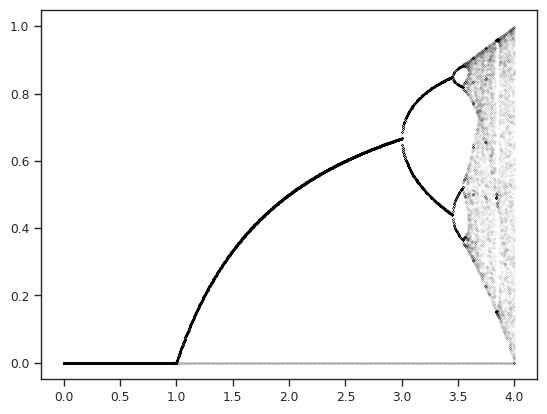

In [114]:
fig, ax = plt.subplots()
ax.plot(rs,
        data.reshape(data.shape[0], data.shape[1] * data.shape[2]),
        '.k',
        ms=0.1,
        alpha=0.5
);

## Problem 5 - Implement autoencoders in `jax`, `equinox`, and `optax`

Implement [autoencoders](https://en.wikipedia.org/wiki/Autoencoder) in `jax` and train it on the MNIST dataset.
Autoencoders, consist of two neural networks, an encoder and a decoder. The encoder maps the input to a latent space (typically of a much smaller dimension than the input), and the decoder maps the latent space back to the input space.
You can think of the encoder as a compression algorithm and the decoder as a decompression algorithm.
Alternatively, you can think of the encoder as the projection of the input data onto a lower-dimensional manifold, and the decoder as the reconstruction operator.

### Part A
Follow these directions:
+ Pick the dimension of the latent space to be 2. This means that the encoder will map the input to a 2-dimensional space, and the decoder will map the 2-dimensional space back to the input space.
+ Your encoder should work on a flattened version of the input image. This means that the input to the encoder is a vector of 784 elements (28x28).
+ Start by picking your encoder $z = f(x;\theta_f)$ to be a neural network with 2 hidden layers, each with 128 units and ReLU activations. Increase the number of units and layers if you think it is necessary.
+ Start by picking your decoder $x' = g(z;\theta_g)$ to be a neural network with 2 hidden layers, each with 128 units and ReLU activations. Increase the number of units and layers if you think it is necessary.
+ Make all your neural networks in `equinox`.
+ The loss function is the mean squared error between the input and the output of the decoder:

$$
\mathcal{L} = \frac{1}{N}\sum_{i=1}^N ||x_i - g(f(x_i;\theta_f);\theta_g)||^2.
$$

where $N$ is the number of samples in the dataset.
+ Split the MNIST dataset into a training and a test set.
+ Use `optax` for the optimization.
+ Train the autoencoder using the Adam optimizer with a learning rate of 0.001 for 1 epoch to debug. Use a batch size of 32. Feel free to play with the learning rate and batch size.
+ Monitor the loss function on the training and test set. Increase the number of epochs up to the point where the loss function on the test set stops decreasing.

Here is the dataset:

In [115]:
# !pip install scikit-learn
# !pip install torch
# !pip install optax
# !pip install torchvision

In [116]:
# Download the MNIST dataset
from sklearn.datasets import fetch_openml
import torch

mnist = fetch_openml('mnist_784', version=1, parser='auto')

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=10000, random_state=42)


**Answer:**

*Put your answer here. Use as many markdown and code blocks as you want.*

In [117]:
# Import libraries
import jax
import jax.numpy as jnp
from jax import lax, vmap
import equinox as eqx
import optax
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from tqdm import tqdm
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import jax.random as jrandom
from sklearn.mixture import GaussianMixture

Defined hyperparameters

In [118]:
# Define Hyperparameters
LEARNING_RATE = 1e-3
NUM_EPOCHS = 200 # epoch to debug
SEED = 42
BATCH_SIZE = 64
key = jrandom.PRNGKey(SEED)

Convert to Dataloader, transform and normalize (sources https://docs.kidger.site/equinox/examples/mnist/ and https://predictivesciencelab.github.io/advanced-scientific-machine-learning/ml-software/optimization/09_gpu_training.html )

torch.Size([1, 28, 28])


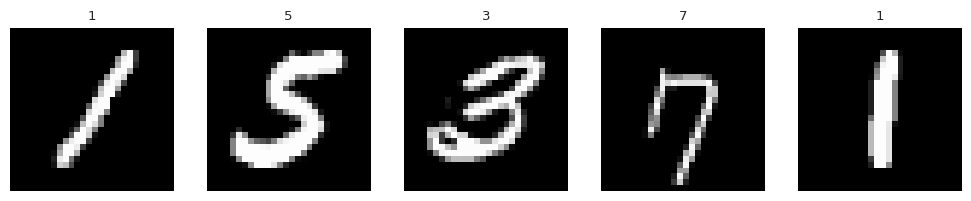

In [119]:
# Convert data to torch tensors and normalize
X_train = torch.tensor(X_train.values, dtype=torch.float32) / 255.0
X_val = torch.tensor(X_val.values, dtype=torch.float32) / 255.0
X_test = torch.tensor(X_test.values, dtype=torch.float32) / 255.0
y_train = torch.tensor(y_train.astype(int).values, dtype=torch.long)
y_val = torch.tensor(y_val.astype(int).values, dtype=torch.long)
y_test = torch.tensor(y_test.astype(int).values, dtype=torch.long)

# Create a custom Dataset class for MNIST
class MNISTDataset(Dataset):
    def __init__(self, X, y, transform=None):
        self.X = X
        self.y = y
        self.transform = transform

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        image = self.X[idx].view(28, 28)
        label = self.y[idx]

        if self.transform:
            image = self.transform(image)

        return image, label

# Define  transformations
transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

# Create DataLoader instances for training, validation, and testing
train_dataset = MNISTDataset(X_train, y_train, transform=transform)
val_dataset = MNISTDataset(X_val, y_val, transform=transform)
test_dataset = MNISTDataset(X_test, y_test, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)


for data, labels in train_dataset:
    print(data.shape)  # Shape of the data in the first batch
    break

# Plot and vizualize dataset
def show_images(images, labels):
    ncols = len(labels)
    nrows = int(np.ceil(len(images) / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 2, nrows * 2))
    for ax in axes.ravel():
        ax.axis("off")
    for ax, image, label in zip(axes.ravel(), images, labels):
        ax.imshow(image.squeeze(), cmap="gray")
        ax.set_title(int(label))
    plt.tight_layout()

# Select 5 random images and vizualize
k = 5
images, labels = next(iter(train_loader))
images = images[:k]
labels = labels[:k]

# Visualize the images
show_images(images, labels)

Create the model

In [120]:
# Define the encoder z=f(x;θf)  to be a neural network with 2 hidden layers, each with 128 units and ReLU activations.
class Encoder(eqx.Module):
    layers: list

    def __init__(self, key):
        key1, key2, key3 = jax.random.split(key, 3)
        self.layers = [
            eqx.nn.Linear(784, 128, key=key1),
            eqx.nn.Linear(128, 128, key=key2),
            eqx.nn.Linear(128, 2, key=key3),
        ]

    def __call__(self, x):
        x = self.layers[0](x)
        for layer in self.layers[1:]:
            x = jax.nn.relu(layer(x))
        return x

# Define the decoder x′=g(z;θg)  to be a neural network with 2 hidden layers, each with 128 units and ReLU activations.
class Decoder(eqx.Module):
    layers: list

    def __init__(self, key):
        key1, key2, key3 = jax.random.split(key, 3)
        self.layers = [
            eqx.nn.Linear(2, 128, key=key1),
            eqx.nn.Linear(128, 128, key=key2),
            eqx.nn.Linear(128, 784, key=key3),
        ]

    def __call__(self, z):
        for layer in self.layers[:-1]:
            z = jax.nn.relu(layer(z))
        return self.layers[-1](z)

## Main model function
class Autoencoder(eqx.Module):
    encoder: Encoder
    decoder: Decoder

    def __init__(self, x):
        key1, key2 = jax.random.split(key, 2)
        self.encoder = Encoder(key)
        self.decoder = Decoder(key)

    def __call__(self, x):
        z = self.encoder(x)
        x_recon = self.decoder(z)
        return x_recon

# Initialize the model
model = Autoencoder(key)

Define MSE loss and Adam optimizer

In [121]:
# Loss function is the mean squared error between the input and the output of the decoder
@eqx.filter_jit
def mse_loss(model, x):
    z = vmap(model.encoder)(x)
    x_recon = vmap(model.decoder)(z)
    return jnp.mean(jnp.sum((x - x_recon) ** 2, axis=1))


# optimizer using optax done!
optim = optax.adamw(LEARNING_RATE)

Evaluate loss

In [122]:
# Define function to update the model losses
def evaluate(model,test_data):
    avg_loss = 0

    for x, y in test_loader:
        x = x.numpy()
        x = x.reshape(x.shape[0], -1)
        avg_loss += mse_loss(model, x)
    return avg_loss / len(test_data)

Define Training loop

In [123]:
# Define main training loop
import time

def train(model, train_loader, test_loader, optim, num_epochs, batch_size):
    opt_state = optim.init(eqx.filter(model, eqx.is_array))

    # Lists to store the losses
    epoch_train_losses = []
    epoch_test_losses = []

    @eqx.filter_jit
    def make_step(model, opt_state, x):
        loss_value, grads = eqx.filter_value_and_grad(mse_loss)(model, x)
        updates, opt_state = optim.update(grads, opt_state, model)
        model = eqx.apply_updates(model, updates)
        return model, opt_state, loss_value
    
    # Overall training time
    start_time = time.time()
    
    # Training loop with tqdm
    for epoch in range(num_epochs):
        epoch_start_time = time.time()
        epoch_train_loss = 0
        with tqdm(total=len(train_loader), desc=f"Epoch {epoch+1}/{num_epochs}", unit="batch") as pbar:
            for step, (x, y) in enumerate(train_loader):

                x = x.numpy()
                x = x.reshape(x.shape[0], -1)  # Flatten the images

                model = eqx.nn.inference_mode(model, value=False)
                model, opt_state, batch_loss = make_step(model, opt_state, x)

                epoch_train_loss += batch_loss  

                pbar.set_postfix(batch_loss=f"{batch_loss:.4f}")
                pbar.update(1)

        # Compute average loss for the epoch
        epoch_train_loss /= len(train_loader)
        epoch_train_losses.append(epoch_train_loss)

        # Evaluate on the test set
        model = eqx.nn.inference_mode(model, value=True)
        test_loss = evaluate(model, test_loader)
        epoch_test_losses.append(test_loss)
        
        
        epoch_end_time = time.time()
        epoch_duration = epoch_end_time - epoch_start_time

        # Print epoch losses
        print(f"Epoch {epoch+1}/{num_epochs}: Train Loss = {epoch_train_loss:.4f}, Test Loss = {test_loss:.4f}")\
    # Overall training time
    total_training_time = time.time() - start_time
    print(f"\nTotal Training Time: {total_training_time:.2f} seconds")
    
    # Plot the loss curve after training
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, num_epochs+1), epoch_train_losses, label="Training Loss", color='blue')
    plt.plot(range(1, num_epochs+1), epoch_test_losses, label="Test Loss", color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Epoch vs. Loss')
    plt.legend()
    plt.grid(True)
    plt.show()
    return model

Moving model to either CPU or GPU (https://predictivesciencelab.github.io/advanced-scientific-machine-learning/ml-software/optimization/09_gpu_training.html).

In [124]:
# Check if GPU is available
is_gpu_avail = len(jax.devices('gpu')) > 0

# Helper functions for committing JAX arrays to a GPU or CPU
trained_model_cpu = lambda x: jax.device_put(x, jax.devices('cpu')[0]) if isinstance(x, jax.Array) else x
trained_model_gpu = lambda x: jax.device_put(x, jax.devices('gpu')[0]) if isinstance(x, jax.Array) else x

# Define functions to transfer model to CPU or GPU
def commit_model_to_device(model, is_gpu_avail):
    if is_gpu_avail:
        model = jax.tree.map(trained_model_gpu, model)
    else:
        model = jax.tree.map(trained_model_cpu, model)
    return model

# Commit model to appropriate device (CPU or GPU)
model = commit_model_to_device(model, is_gpu_avail)

# Print where the model is located
if is_gpu_avail:
    print('The model is on GPU:', jax.devices('gpu')[0])
else:
    print('The model is on CPU:', jax.devices('cpu')[0])

The model is on GPU: cuda:0


Let me training begin!

Begin training


Epoch 1/200: 100%|██████████| 782/782 [00:13<00:00, 56.95batch/s, batch_loss=45.5358] 


Epoch 1/200: Train Loss = 43.2514, Test Loss = 38.3500


Epoch 2/200: 100%|██████████| 782/782 [00:05<00:00, 133.26batch/s, batch_loss=41.1727]


Epoch 2/200: Train Loss = 37.0030, Test Loss = 35.8383


Epoch 3/200: 100%|██████████| 782/782 [00:05<00:00, 138.85batch/s, batch_loss=33.2965]


Epoch 3/200: Train Loss = 35.2650, Test Loss = 34.5413


Epoch 4/200: 100%|██████████| 782/782 [00:05<00:00, 137.76batch/s, batch_loss=33.6847]


Epoch 4/200: Train Loss = 34.3241, Test Loss = 33.9509


Epoch 5/200: 100%|██████████| 782/782 [00:05<00:00, 140.99batch/s, batch_loss=37.1772]


Epoch 5/200: Train Loss = 33.7083, Test Loss = 33.7620


Epoch 6/200: 100%|██████████| 782/782 [00:05<00:00, 134.71batch/s, batch_loss=28.9542]


Epoch 6/200: Train Loss = 33.2768, Test Loss = 33.1029


Epoch 7/200: 100%|██████████| 782/782 [00:05<00:00, 140.51batch/s, batch_loss=32.8363]


Epoch 7/200: Train Loss = 32.8980, Test Loss = 33.0585


Epoch 8/200: 100%|██████████| 782/782 [00:05<00:00, 135.68batch/s, batch_loss=27.2843]


Epoch 8/200: Train Loss = 32.6082, Test Loss = 32.5232


Epoch 9/200: 100%|██████████| 782/782 [00:05<00:00, 136.15batch/s, batch_loss=30.9835]


Epoch 9/200: Train Loss = 32.3559, Test Loss = 32.2396


Epoch 10/200: 100%|██████████| 782/782 [00:05<00:00, 143.82batch/s, batch_loss=34.8540]


Epoch 10/200: Train Loss = 32.1304, Test Loss = 32.1936


Epoch 11/200: 100%|██████████| 782/782 [00:05<00:00, 144.29batch/s, batch_loss=31.0339]


Epoch 11/200: Train Loss = 31.9272, Test Loss = 32.1884


Epoch 12/200: 100%|██████████| 782/782 [00:05<00:00, 145.89batch/s, batch_loss=35.4398]


Epoch 12/200: Train Loss = 31.7725, Test Loss = 32.1384


Epoch 13/200: 100%|██████████| 782/782 [00:05<00:00, 146.03batch/s, batch_loss=26.7362]


Epoch 13/200: Train Loss = 31.6178, Test Loss = 31.8297


Epoch 14/200: 100%|██████████| 782/782 [00:05<00:00, 139.99batch/s, batch_loss=28.5764]


Epoch 14/200: Train Loss = 31.5436, Test Loss = 31.4307


Epoch 15/200: 100%|██████████| 782/782 [00:05<00:00, 143.90batch/s, batch_loss=31.6719]


Epoch 15/200: Train Loss = 31.3995, Test Loss = 31.7305


Epoch 16/200: 100%|██████████| 782/782 [00:05<00:00, 145.85batch/s, batch_loss=34.1299]


Epoch 16/200: Train Loss = 31.2556, Test Loss = 31.1610


Epoch 17/200: 100%|██████████| 782/782 [00:05<00:00, 145.04batch/s, batch_loss=29.0747]


Epoch 17/200: Train Loss = 31.2436, Test Loss = 31.4481


Epoch 18/200: 100%|██████████| 782/782 [00:05<00:00, 145.82batch/s, batch_loss=37.6956]


Epoch 18/200: Train Loss = 31.0963, Test Loss = 31.1526


Epoch 19/200: 100%|██████████| 782/782 [00:05<00:00, 144.15batch/s, batch_loss=34.3038]


Epoch 19/200: Train Loss = 31.0161, Test Loss = 31.0934


Epoch 20/200: 100%|██████████| 782/782 [00:05<00:00, 144.14batch/s, batch_loss=35.0181]


Epoch 20/200: Train Loss = 30.8597, Test Loss = 30.9538


Epoch 21/200: 100%|██████████| 782/782 [00:05<00:00, 144.32batch/s, batch_loss=31.4349]


Epoch 21/200: Train Loss = 30.8695, Test Loss = 31.2485


Epoch 22/200: 100%|██████████| 782/782 [00:05<00:00, 146.06batch/s, batch_loss=31.7834]


Epoch 22/200: Train Loss = 30.8528, Test Loss = 30.9702


Epoch 23/200: 100%|██████████| 782/782 [00:05<00:00, 144.70batch/s, batch_loss=33.4618]


Epoch 23/200: Train Loss = 30.7424, Test Loss = 31.1733


Epoch 24/200: 100%|██████████| 782/782 [00:05<00:00, 135.88batch/s, batch_loss=28.8187]


Epoch 24/200: Train Loss = 30.7609, Test Loss = 30.9207


Epoch 25/200: 100%|██████████| 782/782 [00:05<00:00, 139.95batch/s, batch_loss=28.4342]


Epoch 25/200: Train Loss = 30.6750, Test Loss = 30.8098


Epoch 26/200: 100%|██████████| 782/782 [00:05<00:00, 140.31batch/s, batch_loss=34.8952]


Epoch 26/200: Train Loss = 30.5579, Test Loss = 30.6853


Epoch 27/200: 100%|██████████| 782/782 [00:05<00:00, 140.30batch/s, batch_loss=24.8982]


Epoch 27/200: Train Loss = 30.5157, Test Loss = 30.9207


Epoch 28/200: 100%|██████████| 782/782 [00:05<00:00, 139.39batch/s, batch_loss=34.9245]


Epoch 28/200: Train Loss = 30.5462, Test Loss = 30.5785


Epoch 29/200: 100%|██████████| 782/782 [00:05<00:00, 137.77batch/s, batch_loss=33.3360]


Epoch 29/200: Train Loss = 30.4458, Test Loss = 30.6131


Epoch 30/200: 100%|██████████| 782/782 [00:05<00:00, 142.38batch/s, batch_loss=26.3633]


Epoch 30/200: Train Loss = 30.3915, Test Loss = 30.5372


Epoch 31/200: 100%|██████████| 782/782 [00:05<00:00, 140.18batch/s, batch_loss=22.7220]


Epoch 31/200: Train Loss = 30.3134, Test Loss = 30.4458


Epoch 32/200: 100%|██████████| 782/782 [00:05<00:00, 141.26batch/s, batch_loss=32.0317]


Epoch 32/200: Train Loss = 30.3770, Test Loss = 30.5983


Epoch 33/200: 100%|██████████| 782/782 [00:05<00:00, 142.77batch/s, batch_loss=31.1699]


Epoch 33/200: Train Loss = 30.2725, Test Loss = 30.6496


Epoch 34/200: 100%|██████████| 782/782 [00:05<00:00, 143.10batch/s, batch_loss=25.5798]


Epoch 34/200: Train Loss = 30.1914, Test Loss = 30.4208


Epoch 35/200: 100%|██████████| 782/782 [00:05<00:00, 142.68batch/s, batch_loss=24.3474]


Epoch 35/200: Train Loss = 30.1373, Test Loss = 30.6582


Epoch 36/200: 100%|██████████| 782/782 [00:05<00:00, 140.23batch/s, batch_loss=38.2060]


Epoch 36/200: Train Loss = 30.1753, Test Loss = 30.5635


Epoch 37/200: 100%|██████████| 782/782 [00:05<00:00, 139.19batch/s, batch_loss=27.9168]


Epoch 37/200: Train Loss = 30.1581, Test Loss = 30.5046


Epoch 38/200: 100%|██████████| 782/782 [00:05<00:00, 133.60batch/s, batch_loss=29.5436]


Epoch 38/200: Train Loss = 30.0967, Test Loss = 30.4719


Epoch 39/200: 100%|██████████| 782/782 [00:05<00:00, 139.19batch/s, batch_loss=28.3098]


Epoch 39/200: Train Loss = 30.0156, Test Loss = 30.4636


Epoch 40/200: 100%|██████████| 782/782 [00:05<00:00, 132.55batch/s, batch_loss=31.4044]


Epoch 40/200: Train Loss = 30.0092, Test Loss = 30.4008


Epoch 41/200: 100%|██████████| 782/782 [00:05<00:00, 139.03batch/s, batch_loss=37.1348]


Epoch 41/200: Train Loss = 29.9614, Test Loss = 30.6658


Epoch 42/200: 100%|██████████| 782/782 [00:06<00:00, 118.27batch/s, batch_loss=26.5710]


Epoch 42/200: Train Loss = 29.9761, Test Loss = 30.4473


Epoch 43/200: 100%|██████████| 782/782 [00:05<00:00, 137.81batch/s, batch_loss=31.0189]


Epoch 43/200: Train Loss = 29.9341, Test Loss = 30.8857


Epoch 44/200: 100%|██████████| 782/782 [00:05<00:00, 144.89batch/s, batch_loss=28.6304]


Epoch 44/200: Train Loss = 29.9250, Test Loss = 30.2468


Epoch 45/200: 100%|██████████| 782/782 [00:05<00:00, 144.66batch/s, batch_loss=31.7575]


Epoch 45/200: Train Loss = 29.9280, Test Loss = 30.2440


Epoch 46/200: 100%|██████████| 782/782 [00:05<00:00, 145.00batch/s, batch_loss=33.1427]


Epoch 46/200: Train Loss = 29.8784, Test Loss = 30.3518


Epoch 47/200: 100%|██████████| 782/782 [00:05<00:00, 144.02batch/s, batch_loss=33.4890]


Epoch 47/200: Train Loss = 29.8815, Test Loss = 30.1494


Epoch 48/200: 100%|██████████| 782/782 [00:05<00:00, 146.17batch/s, batch_loss=29.0540]


Epoch 48/200: Train Loss = 29.8901, Test Loss = 30.4890


Epoch 49/200: 100%|██████████| 782/782 [00:05<00:00, 147.02batch/s, batch_loss=36.8231]


Epoch 49/200: Train Loss = 29.8759, Test Loss = 30.2669


Epoch 50/200: 100%|██████████| 782/782 [00:05<00:00, 145.07batch/s, batch_loss=28.9035]


Epoch 50/200: Train Loss = 29.7737, Test Loss = 30.1467


Epoch 51/200: 100%|██████████| 782/782 [00:05<00:00, 145.67batch/s, batch_loss=38.9695]


Epoch 51/200: Train Loss = 29.7654, Test Loss = 30.0993


Epoch 52/200: 100%|██████████| 782/782 [00:05<00:00, 146.20batch/s, batch_loss=30.1769]


Epoch 52/200: Train Loss = 29.8001, Test Loss = 30.2006


Epoch 53/200: 100%|██████████| 782/782 [00:05<00:00, 143.97batch/s, batch_loss=26.1684]


Epoch 53/200: Train Loss = 29.6827, Test Loss = 29.9817


Epoch 54/200: 100%|██████████| 782/782 [00:05<00:00, 141.78batch/s, batch_loss=30.6536]


Epoch 54/200: Train Loss = 29.6937, Test Loss = 30.2853


Epoch 55/200: 100%|██████████| 782/782 [00:05<00:00, 140.59batch/s, batch_loss=25.4811]


Epoch 55/200: Train Loss = 29.7465, Test Loss = 29.7800


Epoch 56/200: 100%|██████████| 782/782 [00:05<00:00, 146.73batch/s, batch_loss=25.1553]


Epoch 56/200: Train Loss = 29.7051, Test Loss = 30.2360


Epoch 57/200: 100%|██████████| 782/782 [00:05<00:00, 145.34batch/s, batch_loss=22.5583]


Epoch 57/200: Train Loss = 29.5840, Test Loss = 29.8909


Epoch 58/200: 100%|██████████| 782/782 [00:05<00:00, 144.27batch/s, batch_loss=34.8535]


Epoch 58/200: Train Loss = 29.6297, Test Loss = 30.0257


Epoch 59/200: 100%|██████████| 782/782 [00:05<00:00, 142.46batch/s, batch_loss=28.5000]


Epoch 59/200: Train Loss = 29.6904, Test Loss = 30.0774


Epoch 60/200: 100%|██████████| 782/782 [00:05<00:00, 145.29batch/s, batch_loss=27.5971]


Epoch 60/200: Train Loss = 29.7235, Test Loss = 30.1650


Epoch 61/200: 100%|██████████| 782/782 [00:05<00:00, 143.50batch/s, batch_loss=28.7875]


Epoch 61/200: Train Loss = 29.7355, Test Loss = 30.1066


Epoch 62/200: 100%|██████████| 782/782 [00:05<00:00, 144.42batch/s, batch_loss=31.9978]


Epoch 62/200: Train Loss = 29.5828, Test Loss = 29.9763


Epoch 63/200: 100%|██████████| 782/782 [00:05<00:00, 145.02batch/s, batch_loss=29.5343]


Epoch 63/200: Train Loss = 29.6086, Test Loss = 30.0115


Epoch 64/200: 100%|██████████| 782/782 [00:05<00:00, 144.12batch/s, batch_loss=32.1785]


Epoch 64/200: Train Loss = 29.5967, Test Loss = 30.0837


Epoch 65/200: 100%|██████████| 782/782 [00:05<00:00, 147.07batch/s, batch_loss=31.4597]


Epoch 65/200: Train Loss = 29.5802, Test Loss = 30.1168


Epoch 66/200: 100%|██████████| 782/782 [00:05<00:00, 142.37batch/s, batch_loss=26.7415]


Epoch 66/200: Train Loss = 29.6064, Test Loss = 29.9456


Epoch 67/200: 100%|██████████| 782/782 [00:05<00:00, 146.43batch/s, batch_loss=29.2928]


Epoch 67/200: Train Loss = 29.5871, Test Loss = 30.0238


Epoch 68/200: 100%|██████████| 782/782 [00:05<00:00, 143.83batch/s, batch_loss=40.3034]


Epoch 68/200: Train Loss = 29.5074, Test Loss = 30.0548


Epoch 69/200: 100%|██████████| 782/782 [00:05<00:00, 145.94batch/s, batch_loss=38.0693]


Epoch 69/200: Train Loss = 29.5903, Test Loss = 29.9401


Epoch 70/200: 100%|██████████| 782/782 [00:05<00:00, 144.63batch/s, batch_loss=27.3861]


Epoch 70/200: Train Loss = 29.4884, Test Loss = 29.8559


Epoch 71/200: 100%|██████████| 782/782 [00:05<00:00, 145.23batch/s, batch_loss=30.0268]


Epoch 71/200: Train Loss = 29.4514, Test Loss = 29.8264


Epoch 72/200: 100%|██████████| 782/782 [00:05<00:00, 145.37batch/s, batch_loss=35.2632]


Epoch 72/200: Train Loss = 29.5596, Test Loss = 30.0197


Epoch 73/200: 100%|██████████| 782/782 [00:05<00:00, 145.04batch/s, batch_loss=23.7095]


Epoch 73/200: Train Loss = 29.5557, Test Loss = 30.0853


Epoch 74/200: 100%|██████████| 782/782 [00:05<00:00, 146.92batch/s, batch_loss=25.4806]


Epoch 74/200: Train Loss = 29.5798, Test Loss = 30.1188


Epoch 75/200: 100%|██████████| 782/782 [00:05<00:00, 143.89batch/s, batch_loss=35.8192]


Epoch 75/200: Train Loss = 29.5238, Test Loss = 29.9835


Epoch 76/200: 100%|██████████| 782/782 [00:05<00:00, 145.84batch/s, batch_loss=22.9909]


Epoch 76/200: Train Loss = 29.5215, Test Loss = 29.9442


Epoch 77/200: 100%|██████████| 782/782 [00:05<00:00, 144.52batch/s, batch_loss=22.6700]


Epoch 77/200: Train Loss = 29.4016, Test Loss = 29.7725


Epoch 78/200: 100%|██████████| 782/782 [00:05<00:00, 143.00batch/s, batch_loss=32.4233]


Epoch 78/200: Train Loss = 29.4341, Test Loss = 30.0454


Epoch 79/200: 100%|██████████| 782/782 [00:05<00:00, 146.48batch/s, batch_loss=25.9195]


Epoch 79/200: Train Loss = 29.3874, Test Loss = 30.4929


Epoch 80/200: 100%|██████████| 782/782 [00:05<00:00, 145.06batch/s, batch_loss=30.2451]


Epoch 80/200: Train Loss = 29.3531, Test Loss = 30.0907


Epoch 81/200: 100%|██████████| 782/782 [00:05<00:00, 144.02batch/s, batch_loss=27.4700]


Epoch 81/200: Train Loss = 29.3047, Test Loss = 30.0055


Epoch 82/200: 100%|██████████| 782/782 [00:05<00:00, 146.90batch/s, batch_loss=34.1551]


Epoch 82/200: Train Loss = 29.3376, Test Loss = 29.8441


Epoch 83/200: 100%|██████████| 782/782 [00:05<00:00, 144.71batch/s, batch_loss=27.3242]


Epoch 83/200: Train Loss = 29.2685, Test Loss = 29.8036


Epoch 84/200: 100%|██████████| 782/782 [00:05<00:00, 145.92batch/s, batch_loss=33.2577]


Epoch 84/200: Train Loss = 29.3475, Test Loss = 29.8855


Epoch 85/200: 100%|██████████| 782/782 [00:05<00:00, 144.88batch/s, batch_loss=24.6870]


Epoch 85/200: Train Loss = 29.2475, Test Loss = 30.1075


Epoch 86/200: 100%|██████████| 782/782 [00:05<00:00, 142.02batch/s, batch_loss=25.7257]


Epoch 86/200: Train Loss = 29.2541, Test Loss = 29.7915


Epoch 87/200: 100%|██████████| 782/782 [00:05<00:00, 143.40batch/s, batch_loss=31.1034]


Epoch 87/200: Train Loss = 29.2702, Test Loss = 29.9919


Epoch 88/200: 100%|██████████| 782/782 [00:05<00:00, 147.67batch/s, batch_loss=22.4401]


Epoch 88/200: Train Loss = 29.2639, Test Loss = 29.8054


Epoch 89/200: 100%|██████████| 782/782 [00:05<00:00, 145.70batch/s, batch_loss=30.9415]


Epoch 89/200: Train Loss = 29.2959, Test Loss = 29.6621


Epoch 90/200: 100%|██████████| 782/782 [00:05<00:00, 144.95batch/s, batch_loss=29.3000]


Epoch 90/200: Train Loss = 29.3357, Test Loss = 29.8323


Epoch 91/200: 100%|██████████| 782/782 [00:05<00:00, 142.71batch/s, batch_loss=28.2010]


Epoch 91/200: Train Loss = 29.1891, Test Loss = 29.7579


Epoch 92/200: 100%|██████████| 782/782 [00:05<00:00, 145.07batch/s, batch_loss=31.0222]


Epoch 92/200: Train Loss = 29.1861, Test Loss = 29.7970


Epoch 93/200: 100%|██████████| 782/782 [00:05<00:00, 144.97batch/s, batch_loss=26.7115]


Epoch 93/200: Train Loss = 29.2650, Test Loss = 29.4943


Epoch 94/200: 100%|██████████| 782/782 [00:05<00:00, 145.90batch/s, batch_loss=26.8746]


Epoch 94/200: Train Loss = 29.1245, Test Loss = 29.5901


Epoch 95/200: 100%|██████████| 782/782 [00:05<00:00, 142.25batch/s, batch_loss=23.1926]


Epoch 95/200: Train Loss = 29.2878, Test Loss = 29.7071


Epoch 96/200: 100%|██████████| 782/782 [00:05<00:00, 143.63batch/s, batch_loss=28.5314]


Epoch 96/200: Train Loss = 29.1504, Test Loss = 29.5774


Epoch 97/200: 100%|██████████| 782/782 [00:05<00:00, 143.39batch/s, batch_loss=25.6306]


Epoch 97/200: Train Loss = 29.1819, Test Loss = 29.5303


Epoch 98/200: 100%|██████████| 782/782 [00:05<00:00, 143.79batch/s, batch_loss=24.9505]


Epoch 98/200: Train Loss = 29.0691, Test Loss = 29.6423


Epoch 99/200: 100%|██████████| 782/782 [00:05<00:00, 144.01batch/s, batch_loss=31.5038]


Epoch 99/200: Train Loss = 29.1850, Test Loss = 29.4563


Epoch 100/200: 100%|██████████| 782/782 [00:05<00:00, 144.83batch/s, batch_loss=30.0272]


Epoch 100/200: Train Loss = 29.1122, Test Loss = 29.7183


Epoch 101/200: 100%|██████████| 782/782 [00:05<00:00, 144.48batch/s, batch_loss=29.3803]


Epoch 101/200: Train Loss = 29.1457, Test Loss = 29.6104


Epoch 102/200: 100%|██████████| 782/782 [00:05<00:00, 145.41batch/s, batch_loss=33.1091]


Epoch 102/200: Train Loss = 29.1022, Test Loss = 29.5157


Epoch 103/200: 100%|██████████| 782/782 [00:05<00:00, 143.53batch/s, batch_loss=36.5294]


Epoch 103/200: Train Loss = 29.1698, Test Loss = 29.6866


Epoch 104/200: 100%|██████████| 782/782 [00:05<00:00, 145.66batch/s, batch_loss=27.7812]


Epoch 104/200: Train Loss = 29.1559, Test Loss = 30.1712


Epoch 105/200: 100%|██████████| 782/782 [00:05<00:00, 144.57batch/s, batch_loss=27.2240]


Epoch 105/200: Train Loss = 29.2299, Test Loss = 29.3962


Epoch 106/200: 100%|██████████| 782/782 [00:05<00:00, 143.72batch/s, batch_loss=27.8561]


Epoch 106/200: Train Loss = 29.0163, Test Loss = 29.5232


Epoch 107/200: 100%|██████████| 782/782 [00:05<00:00, 144.13batch/s, batch_loss=37.3518]


Epoch 107/200: Train Loss = 29.0922, Test Loss = 29.8981


Epoch 108/200: 100%|██████████| 782/782 [00:05<00:00, 144.36batch/s, batch_loss=27.9456]


Epoch 108/200: Train Loss = 29.0209, Test Loss = 29.9392


Epoch 109/200: 100%|██████████| 782/782 [00:05<00:00, 142.90batch/s, batch_loss=26.6848]


Epoch 109/200: Train Loss = 29.0207, Test Loss = 29.3933


Epoch 110/200: 100%|██████████| 782/782 [00:05<00:00, 144.29batch/s, batch_loss=27.3124]


Epoch 110/200: Train Loss = 29.0385, Test Loss = 29.6950


Epoch 111/200: 100%|██████████| 782/782 [00:05<00:00, 145.22batch/s, batch_loss=27.5888]


Epoch 111/200: Train Loss = 28.9946, Test Loss = 29.7244


Epoch 112/200: 100%|██████████| 782/782 [00:05<00:00, 140.53batch/s, batch_loss=38.6551]


Epoch 112/200: Train Loss = 29.0636, Test Loss = 29.6633


Epoch 113/200: 100%|██████████| 782/782 [00:05<00:00, 145.49batch/s, batch_loss=29.1514]


Epoch 113/200: Train Loss = 28.9728, Test Loss = 29.4832


Epoch 114/200: 100%|██████████| 782/782 [00:05<00:00, 137.86batch/s, batch_loss=28.9258]


Epoch 114/200: Train Loss = 28.9724, Test Loss = 29.6368


Epoch 115/200: 100%|██████████| 782/782 [00:05<00:00, 140.94batch/s, batch_loss=31.8705]


Epoch 115/200: Train Loss = 29.0195, Test Loss = 29.3937


Epoch 116/200: 100%|██████████| 782/782 [00:05<00:00, 141.01batch/s, batch_loss=29.8615]


Epoch 116/200: Train Loss = 28.9300, Test Loss = 29.5572


Epoch 117/200: 100%|██████████| 782/782 [00:05<00:00, 141.22batch/s, batch_loss=29.2021]


Epoch 117/200: Train Loss = 28.9155, Test Loss = 29.3990


Epoch 118/200: 100%|██████████| 782/782 [00:05<00:00, 136.51batch/s, batch_loss=33.2067]


Epoch 118/200: Train Loss = 28.9146, Test Loss = 29.7113


Epoch 119/200: 100%|██████████| 782/782 [00:05<00:00, 139.99batch/s, batch_loss=31.6797]


Epoch 119/200: Train Loss = 28.9607, Test Loss = 29.4044


Epoch 120/200: 100%|██████████| 782/782 [00:05<00:00, 142.26batch/s, batch_loss=26.4285]


Epoch 120/200: Train Loss = 28.9243, Test Loss = 29.3192


Epoch 121/200: 100%|██████████| 782/782 [00:05<00:00, 139.85batch/s, batch_loss=26.6261]


Epoch 121/200: Train Loss = 28.9223, Test Loss = 29.5257


Epoch 122/200: 100%|██████████| 782/782 [00:05<00:00, 140.94batch/s, batch_loss=22.2258]


Epoch 122/200: Train Loss = 28.9255, Test Loss = 29.7869


Epoch 123/200: 100%|██████████| 782/782 [00:05<00:00, 139.01batch/s, batch_loss=29.4743]


Epoch 123/200: Train Loss = 29.0824, Test Loss = 29.5784


Epoch 124/200: 100%|██████████| 782/782 [00:05<00:00, 142.24batch/s, batch_loss=37.7742]


Epoch 124/200: Train Loss = 28.7910, Test Loss = 29.4543


Epoch 125/200: 100%|██████████| 782/782 [00:05<00:00, 135.44batch/s, batch_loss=25.0861]


Epoch 125/200: Train Loss = 28.8742, Test Loss = 29.5840


Epoch 126/200: 100%|██████████| 782/782 [00:05<00:00, 137.84batch/s, batch_loss=26.8862]


Epoch 126/200: Train Loss = 28.8283, Test Loss = 29.3724


Epoch 127/200: 100%|██████████| 782/782 [00:05<00:00, 141.64batch/s, batch_loss=29.0073]


Epoch 127/200: Train Loss = 28.8702, Test Loss = 29.1492


Epoch 128/200: 100%|██████████| 782/782 [00:05<00:00, 140.89batch/s, batch_loss=25.7928]


Epoch 128/200: Train Loss = 28.8289, Test Loss = 29.6897


Epoch 129/200: 100%|██████████| 782/782 [00:05<00:00, 139.34batch/s, batch_loss=31.1502]


Epoch 129/200: Train Loss = 28.8887, Test Loss = 29.4594


Epoch 130/200: 100%|██████████| 782/782 [00:05<00:00, 139.39batch/s, batch_loss=31.3354]


Epoch 130/200: Train Loss = 28.8390, Test Loss = 29.4548


Epoch 131/200: 100%|██████████| 782/782 [00:05<00:00, 142.07batch/s, batch_loss=24.6521]


Epoch 131/200: Train Loss = 28.8981, Test Loss = 29.7800


Epoch 132/200: 100%|██████████| 782/782 [00:05<00:00, 139.74batch/s, batch_loss=36.8924]


Epoch 132/200: Train Loss = 28.9634, Test Loss = 29.6295


Epoch 133/200: 100%|██████████| 782/782 [00:05<00:00, 142.44batch/s, batch_loss=25.6902]


Epoch 133/200: Train Loss = 29.0227, Test Loss = 29.7722


Epoch 134/200: 100%|██████████| 782/782 [00:05<00:00, 139.81batch/s, batch_loss=32.7738]


Epoch 134/200: Train Loss = 28.8394, Test Loss = 29.6098


Epoch 135/200: 100%|██████████| 782/782 [00:05<00:00, 143.22batch/s, batch_loss=27.8580]


Epoch 135/200: Train Loss = 28.8383, Test Loss = 29.6113


Epoch 136/200: 100%|██████████| 782/782 [00:05<00:00, 141.38batch/s, batch_loss=26.4113]


Epoch 136/200: Train Loss = 28.8253, Test Loss = 29.3561


Epoch 137/200: 100%|██████████| 782/782 [00:05<00:00, 140.61batch/s, batch_loss=29.1507]


Epoch 137/200: Train Loss = 28.7836, Test Loss = 29.2155


Epoch 138/200: 100%|██████████| 782/782 [00:05<00:00, 143.46batch/s, batch_loss=22.0436]


Epoch 138/200: Train Loss = 28.7712, Test Loss = 29.3372


Epoch 139/200: 100%|██████████| 782/782 [00:05<00:00, 139.80batch/s, batch_loss=31.9877]


Epoch 139/200: Train Loss = 28.8176, Test Loss = 29.6939


Epoch 140/200: 100%|██████████| 782/782 [00:05<00:00, 141.39batch/s, batch_loss=27.6802]


Epoch 140/200: Train Loss = 28.7829, Test Loss = 29.3258


Epoch 141/200: 100%|██████████| 782/782 [00:05<00:00, 137.42batch/s, batch_loss=25.5934]


Epoch 141/200: Train Loss = 28.7367, Test Loss = 29.5405


Epoch 142/200: 100%|██████████| 782/782 [00:05<00:00, 135.27batch/s, batch_loss=29.8758]


Epoch 142/200: Train Loss = 28.7562, Test Loss = 29.2618


Epoch 143/200: 100%|██████████| 782/782 [00:05<00:00, 135.99batch/s, batch_loss=29.9845]


Epoch 143/200: Train Loss = 28.7181, Test Loss = 29.2778


Epoch 144/200: 100%|██████████| 782/782 [00:05<00:00, 140.74batch/s, batch_loss=35.2971]


Epoch 144/200: Train Loss = 28.8123, Test Loss = 30.0039


Epoch 145/200: 100%|██████████| 782/782 [00:05<00:00, 136.72batch/s, batch_loss=26.2346]


Epoch 145/200: Train Loss = 29.0479, Test Loss = 29.3569


Epoch 146/200: 100%|██████████| 782/782 [00:05<00:00, 139.91batch/s, batch_loss=26.9712]


Epoch 146/200: Train Loss = 28.8191, Test Loss = 29.2701


Epoch 147/200: 100%|██████████| 782/782 [00:05<00:00, 139.01batch/s, batch_loss=30.1420]


Epoch 147/200: Train Loss = 28.7026, Test Loss = 29.3642


Epoch 148/200: 100%|██████████| 782/782 [00:05<00:00, 137.57batch/s, batch_loss=26.9357]


Epoch 148/200: Train Loss = 28.6679, Test Loss = 29.4875


Epoch 149/200: 100%|██████████| 782/782 [00:05<00:00, 138.96batch/s, batch_loss=27.1343]


Epoch 149/200: Train Loss = 28.6847, Test Loss = 29.4012


Epoch 150/200: 100%|██████████| 782/782 [00:05<00:00, 142.66batch/s, batch_loss=31.7571]


Epoch 150/200: Train Loss = 28.7122, Test Loss = 29.9087


Epoch 151/200: 100%|██████████| 782/782 [00:05<00:00, 140.01batch/s, batch_loss=21.7639]


Epoch 151/200: Train Loss = 28.6834, Test Loss = 29.7984


Epoch 152/200: 100%|██████████| 782/782 [00:05<00:00, 140.25batch/s, batch_loss=24.5311]


Epoch 152/200: Train Loss = 28.6831, Test Loss = 29.4422


Epoch 153/200: 100%|██████████| 782/782 [00:05<00:00, 139.41batch/s, batch_loss=26.0880]


Epoch 153/200: Train Loss = 28.7198, Test Loss = 29.3160


Epoch 154/200: 100%|██████████| 782/782 [00:05<00:00, 139.09batch/s, batch_loss=27.7414]


Epoch 154/200: Train Loss = 28.7041, Test Loss = 29.6192


Epoch 155/200: 100%|██████████| 782/782 [00:05<00:00, 141.97batch/s, batch_loss=32.2129]


Epoch 155/200: Train Loss = 28.7536, Test Loss = 29.7401


Epoch 156/200: 100%|██████████| 782/782 [00:05<00:00, 140.71batch/s, batch_loss=28.6921]


Epoch 156/200: Train Loss = 28.6265, Test Loss = 29.3672


Epoch 157/200: 100%|██████████| 782/782 [00:05<00:00, 137.01batch/s, batch_loss=27.1757]


Epoch 157/200: Train Loss = 28.6006, Test Loss = 29.2952


Epoch 158/200: 100%|██████████| 782/782 [00:05<00:00, 141.55batch/s, batch_loss=33.6380]


Epoch 158/200: Train Loss = 28.5863, Test Loss = 29.3060


Epoch 159/200: 100%|██████████| 782/782 [00:05<00:00, 140.03batch/s, batch_loss=26.8074]


Epoch 159/200: Train Loss = 28.7356, Test Loss = 29.2462


Epoch 160/200: 100%|██████████| 782/782 [00:05<00:00, 132.25batch/s, batch_loss=23.5829]


Epoch 160/200: Train Loss = 28.6304, Test Loss = 29.3608


Epoch 161/200: 100%|██████████| 782/782 [00:05<00:00, 133.33batch/s, batch_loss=31.0331]


Epoch 161/200: Train Loss = 28.5268, Test Loss = 29.3066


Epoch 162/200: 100%|██████████| 782/782 [00:05<00:00, 140.11batch/s, batch_loss=39.7654]


Epoch 162/200: Train Loss = 28.5530, Test Loss = 29.4461


Epoch 163/200: 100%|██████████| 782/782 [00:05<00:00, 139.50batch/s, batch_loss=30.0412]


Epoch 163/200: Train Loss = 28.6225, Test Loss = 29.4165


Epoch 164/200: 100%|██████████| 782/782 [00:05<00:00, 141.51batch/s, batch_loss=29.0996]


Epoch 164/200: Train Loss = 28.6540, Test Loss = 29.4872


Epoch 165/200: 100%|██████████| 782/782 [00:05<00:00, 143.61batch/s, batch_loss=34.5128]


Epoch 165/200: Train Loss = 28.6930, Test Loss = 29.3511


Epoch 166/200: 100%|██████████| 782/782 [00:05<00:00, 143.33batch/s, batch_loss=26.9410]


Epoch 166/200: Train Loss = 28.7076, Test Loss = 29.5630


Epoch 167/200: 100%|██████████| 782/782 [00:05<00:00, 143.26batch/s, batch_loss=27.7358]


Epoch 167/200: Train Loss = 28.6831, Test Loss = 29.5734


Epoch 168/200: 100%|██████████| 782/782 [00:05<00:00, 140.57batch/s, batch_loss=30.8991]


Epoch 168/200: Train Loss = 28.6248, Test Loss = 29.3211


Epoch 169/200: 100%|██████████| 782/782 [00:05<00:00, 136.09batch/s, batch_loss=29.1037]


Epoch 169/200: Train Loss = 28.6692, Test Loss = 29.4703


Epoch 170/200: 100%|██████████| 782/782 [00:05<00:00, 142.79batch/s, batch_loss=25.2464]


Epoch 170/200: Train Loss = 28.6490, Test Loss = 29.1734


Epoch 171/200: 100%|██████████| 782/782 [00:05<00:00, 140.59batch/s, batch_loss=23.5804]


Epoch 171/200: Train Loss = 28.6506, Test Loss = 29.2844


Epoch 172/200: 100%|██████████| 782/782 [00:05<00:00, 138.50batch/s, batch_loss=29.4391]


Epoch 172/200: Train Loss = 28.5709, Test Loss = 29.3471


Epoch 173/200: 100%|██████████| 782/782 [00:05<00:00, 139.15batch/s, batch_loss=25.8330]


Epoch 173/200: Train Loss = 28.7124, Test Loss = 29.3763


Epoch 174/200: 100%|██████████| 782/782 [00:05<00:00, 140.33batch/s, batch_loss=26.5632]


Epoch 174/200: Train Loss = 28.5963, Test Loss = 29.3171


Epoch 175/200: 100%|██████████| 782/782 [00:05<00:00, 144.40batch/s, batch_loss=27.0186]


Epoch 175/200: Train Loss = 28.5798, Test Loss = 29.3053


Epoch 176/200: 100%|██████████| 782/782 [00:05<00:00, 141.58batch/s, batch_loss=27.3322]


Epoch 176/200: Train Loss = 28.7005, Test Loss = 29.3150


Epoch 177/200: 100%|██████████| 782/782 [00:05<00:00, 140.42batch/s, batch_loss=30.9159]


Epoch 177/200: Train Loss = 28.6122, Test Loss = 29.4974


Epoch 178/200: 100%|██████████| 782/782 [00:05<00:00, 141.62batch/s, batch_loss=29.7808]


Epoch 178/200: Train Loss = 28.5952, Test Loss = 29.4673


Epoch 179/200: 100%|██████████| 782/782 [00:05<00:00, 142.47batch/s, batch_loss=31.0218]


Epoch 179/200: Train Loss = 28.6457, Test Loss = 29.3340


Epoch 180/200: 100%|██████████| 782/782 [00:05<00:00, 140.62batch/s, batch_loss=33.6626]


Epoch 180/200: Train Loss = 28.6845, Test Loss = 29.1710


Epoch 181/200: 100%|██████████| 782/782 [00:05<00:00, 143.67batch/s, batch_loss=25.5417]


Epoch 181/200: Train Loss = 28.5364, Test Loss = 29.3886


Epoch 182/200: 100%|██████████| 782/782 [00:05<00:00, 138.57batch/s, batch_loss=28.7497]


Epoch 182/200: Train Loss = 28.5147, Test Loss = 29.1807


Epoch 183/200: 100%|██████████| 782/782 [00:05<00:00, 141.28batch/s, batch_loss=29.0122]


Epoch 183/200: Train Loss = 28.4754, Test Loss = 29.2103


Epoch 184/200: 100%|██████████| 782/782 [00:05<00:00, 141.88batch/s, batch_loss=26.0975]


Epoch 184/200: Train Loss = 28.4223, Test Loss = 29.0565


Epoch 185/200: 100%|██████████| 782/782 [00:05<00:00, 136.79batch/s, batch_loss=27.1943]


Epoch 185/200: Train Loss = 28.4128, Test Loss = 29.0399


Epoch 186/200: 100%|██████████| 782/782 [00:05<00:00, 142.54batch/s, batch_loss=28.2983]


Epoch 186/200: Train Loss = 28.4989, Test Loss = 29.4430


Epoch 187/200: 100%|██████████| 782/782 [00:05<00:00, 137.36batch/s, batch_loss=32.9471]


Epoch 187/200: Train Loss = 28.6822, Test Loss = 29.3291


Epoch 188/200: 100%|██████████| 782/782 [00:05<00:00, 130.92batch/s, batch_loss=27.3841]


Epoch 188/200: Train Loss = 28.5391, Test Loss = 29.2332


Epoch 189/200: 100%|██████████| 782/782 [00:05<00:00, 137.22batch/s, batch_loss=37.2768]


Epoch 189/200: Train Loss = 28.6014, Test Loss = 29.3949


Epoch 190/200: 100%|██████████| 782/782 [00:05<00:00, 135.92batch/s, batch_loss=27.4988]


Epoch 190/200: Train Loss = 28.5910, Test Loss = 29.2976


Epoch 191/200: 100%|██████████| 782/782 [00:05<00:00, 140.80batch/s, batch_loss=31.2775]


Epoch 191/200: Train Loss = 28.4930, Test Loss = 29.2918


Epoch 192/200: 100%|██████████| 782/782 [00:05<00:00, 143.57batch/s, batch_loss=20.0859]


Epoch 192/200: Train Loss = 28.5257, Test Loss = 29.1526


Epoch 193/200: 100%|██████████| 782/782 [00:05<00:00, 140.94batch/s, batch_loss=30.8801]


Epoch 193/200: Train Loss = 28.5638, Test Loss = 29.4086


Epoch 194/200: 100%|██████████| 782/782 [00:05<00:00, 140.71batch/s, batch_loss=29.8774]


Epoch 194/200: Train Loss = 28.5040, Test Loss = 29.4232


Epoch 195/200: 100%|██████████| 782/782 [00:05<00:00, 139.42batch/s, batch_loss=34.0041]


Epoch 195/200: Train Loss = 28.4967, Test Loss = 29.3346


Epoch 196/200: 100%|██████████| 782/782 [00:05<00:00, 141.98batch/s, batch_loss=34.3965]


Epoch 196/200: Train Loss = 28.5691, Test Loss = 29.1814


Epoch 197/200: 100%|██████████| 782/782 [00:05<00:00, 140.60batch/s, batch_loss=27.7326]


Epoch 197/200: Train Loss = 28.4680, Test Loss = 29.3361


Epoch 198/200: 100%|██████████| 782/782 [00:05<00:00, 142.01batch/s, batch_loss=38.2192]


Epoch 198/200: Train Loss = 28.6296, Test Loss = 29.1585


Epoch 199/200: 100%|██████████| 782/782 [00:05<00:00, 136.31batch/s, batch_loss=29.5170]


Epoch 199/200: Train Loss = 28.4336, Test Loss = 29.2730


Epoch 200/200: 100%|██████████| 782/782 [00:05<00:00, 139.34batch/s, batch_loss=27.0323]


Epoch 200/200: Train Loss = 28.4696, Test Loss = 29.2359

Total Training Time: 1276.25 seconds


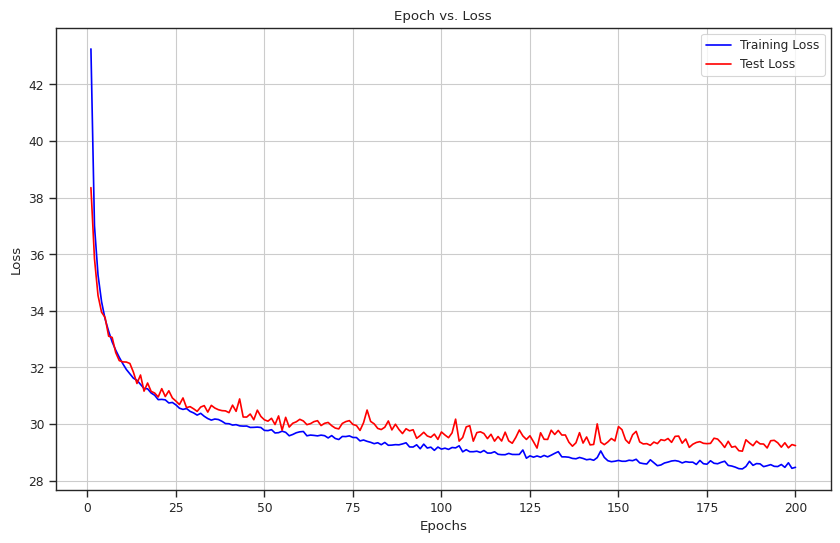

In [125]:
print("Begin training")
trained_model = train(model, train_loader, test_loader, optim, NUM_EPOCHS, BATCH_SIZE)

### Part B

Pick the first five digits in the test set and plot the original and reconstructed images.

**Answer:**

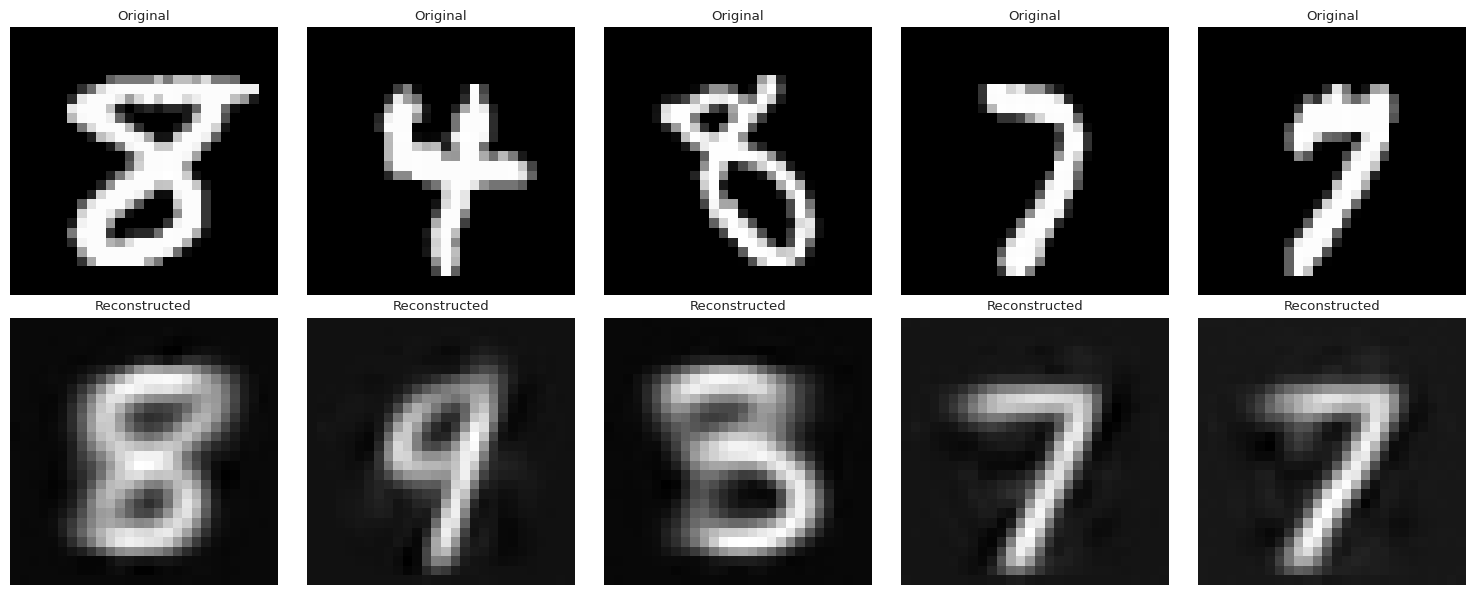

In [126]:
# your code here

# Define a function to plot the original and reconstructed images
def plot_original_and_reconstructed(model, test_loader):
    test_iter = iter(test_loader)
    x, _ = next(test_iter)  
    x = x[:5].numpy()       
    x_flat = x.reshape(x.shape[0], -1)  

    # Reconstruct the images
    model = eqx.nn.inference_mode(model, value=True)
    x_recon = vmap(model)(x_flat).reshape(-1, 28, 28) 


    fig, axes = plt.subplots(2, 5, figsize=(15, 6))

    for i in range(5):
        # Original images
        axes[0, i].imshow(x[i, 0], cmap="gray")
        axes[0, i].axis("off")
        axes[0, i].set_title("Original")

        # Reconstructed images
        axes[1, i].imshow(x_recon[i], cmap="gray")
        axes[1, i].axis("off")
        axes[1, i].set_title("Reconstructed")
    plt.tight_layout()
    plt.show()

# Call the function
plot_original_and_reconstructed(trained_model, test_loader)

### Part C

Plot the projections of the digits in the latent space (training and test).

**Answer:**

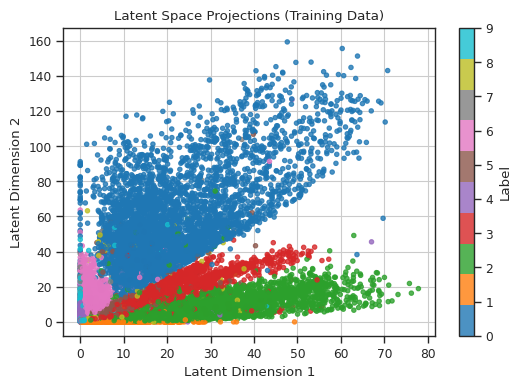

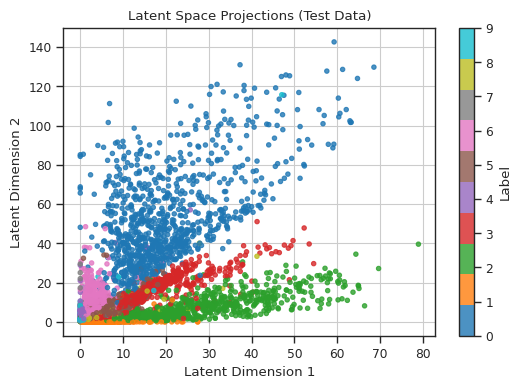

In [127]:
# your code here

def plot_latent_space_projections(model, loader, title):
    # Encode all images in the loader into the latent space
    latent_space = []
    labels = []

    for x, y in loader:
        x = x.numpy().reshape(x.shape[0], -1)
        latent_space.append(jax.vmap(model.encoder)(x))
        labels.append(y.numpy())
               
    # labels = jnp.hstack(labels)
    # latent_space = jnp.vstack(latent_space)
    latent_space = jnp.concatenate(latent_space, axis=0)
    labels = jnp.concatenate(labels, axis=0)

    plt.figure(figsize=(6, 4))
    scatter = plt.scatter(latent_space[:, 0], latent_space[:, 1], c=labels, cmap="tab10", s=10, alpha=0.8)
    plt.colorbar(scatter, label="Label")
    plt.title(f"Latent Space Projections ({title})")
    plt.xlabel("Latent Dimension 1")
    plt.ylabel("Latent Dimension 2")
    plt.grid(True)
    plt.show()

# Plot projections for training and test data
plot_latent_space_projections(trained_model, train_loader, title="Training Data")
plot_latent_space_projections(trained_model, test_loader, title="Test Data")

### Part D

Use `scikitlearn` to fit a mixture of Gaussians to the latent space. Use 10 components.
Then sample five times from the fitted mixture of Gaussians, reconstruct the samples, and plot the reconstructed images.

**Answer:**

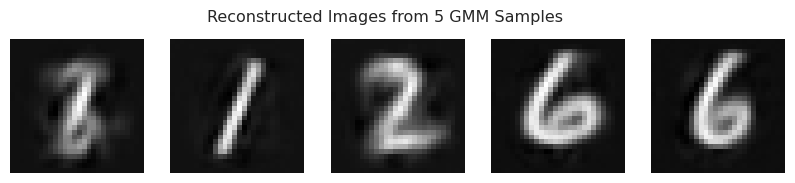

In [128]:
# Function to fit a Gaussian Mixture Model (GMM) to the latent space and reconstruct images
def fit_gmm_and_reconstruct(loader, model, num_components=10, num_samples=5, random_state= None):

    # same code snippet from previous block 
    latent_space = []
    labels = []

    for x, y in loader:
        x = x.numpy().reshape(x.shape[0], -1)
        latent_space.append(jax.vmap(model.encoder)(x))
        labels.append(y.numpy())
               
    labels = jnp.hstack(labels)
    latent_space = jnp.vstack(latent_space)

    # Fit a Gaussian Mixture Model (GMM) with specified components
    gmm = GaussianMixture(n_components=num_components, random_state=random_state)
    gmm.fit(np.array(latent_space))

    # Sample from the GMM and reconstruct the images
    samples, _ = gmm.sample(num_samples)
    
    # Decode and plot
    reconstructed_images = jax.vmap(model.decoder)(jnp.array(samples))
    plt.figure(figsize=(10, 2))
    for i, img in enumerate(reconstructed_images):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img.reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Reconstructed Images from {num_samples} GMM Samples")
    plt.show()

# Call the function
fit_gmm_and_reconstruct(train_loader, trained_model, num_components=10, num_samples=5, random_state=SEED)